# Projects in Machine Learning HW1
 Yu-Kai "Steven" Wang

## Task 1: Problem
I want to build a algorithm to distinguish the "0" and "1" handwritten digits. Logistic regression is perfect for this task since I believe the features of these two digits are different enough to be easily solved by a simple logistic regression algorithm 

## Task 2: Dataset
I will be using the MNIST dataset, and will only be using the images that has the label of "0" or "1". Link below:

http://yann.lecun.com/exdb/mnist/

Basic data parsing and visualization below:

In [1]:
import idx2numpy
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train_imgs = idx2numpy.convert_from_file('./train-images-idx3-ubyte/train-images.idx3-ubyte')
train_lbls = idx2numpy.convert_from_file('./train-labels-idx1-ubyte/train-labels.idx1-ubyte')
test_imgs = idx2numpy.convert_from_file('./t10k-images-idx3-ubyte/t10k-images.idx3-ubyte')
test_lbls = idx2numpy.convert_from_file('./t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte')

In [3]:
print(train_imgs.shape)
print(train_lbls.shape)
print(test_imgs.shape)
print(test_lbls.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Extract images "0" and "1"

In [4]:
train_dataset = train_imgs[(train_lbls == 0) | (train_lbls == 1)]
train_label = train_lbls[(train_lbls == 0) | (train_lbls == 1)]
test_dataset = test_imgs[(test_lbls == 0) | (test_lbls == 1)]
test_label = test_lbls[(test_lbls == 0) | (test_lbls == 1)]
print(train_dataset.shape)
print(train_label.shape)
print(test_dataset.shape)
print(test_label.shape)

(12665, 28, 28)
(12665,)
(2115, 28, 28)
(2115,)


normalize and reduce data

In [5]:
train_dataset = train_dataset / 255
train_dataset = train_dataset[:, 4:24, 4:24]
test_dataset = test_dataset / 255
test_dataset = test_dataset[:, 4:24, 4:24]

Sample visualization

Label: 0


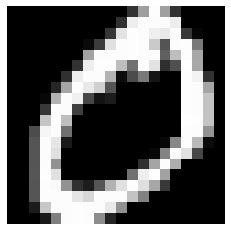

In [6]:
plt.imshow(train_dataset[0], cmap='gray')
plt.axis('off')
print(f'Label: {train_label[0]}')

Feature engineering (2 features)

In [7]:
def extract_feature(data):
    feat1 = np.mean(data[:, :10, :] - data[:, 10:, :], axis=(1,2))
    feat2 = np.sum(data[:, 8:14, 8:14], axis=(1,2))
    return np.vstack((feat1, feat2))

In [8]:
train_feats = extract_feature(train_dataset)
train_feats.shape

(2, 12665)

In [9]:
test_feats = extract_feature(test_dataset)
test_feats.shape

(2, 2115)

Feature visualization

Text(0, 0.5, 'top_half')

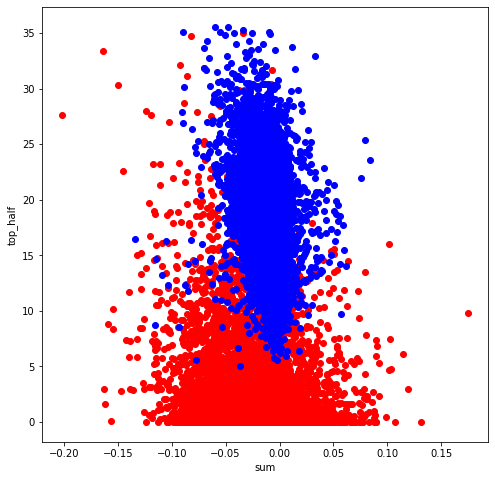

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(train_feats[0, train_label == 0], train_feats[1, train_label == 0], color='red')
plt.scatter(train_feats[0, train_label == 1], train_feats[1, train_label == 1], color='blue')
plt.xlabel('sum')
plt.ylabel('top_half')

## Task3: Logistic Regression

Cost function (Log loss):
$$
Cost = \frac{1}{N} \sum^N_{i=0} -y_i\log(\hat{y}_i) - (1 - y_i)\log(1-\hat{y}_i))
$$
Sigmoid is used as the activation function. The two variant of gradient descent I implemented are vanilla gradient descent and mini-batch gradient descent.

In [11]:
def batch_generator(data, label, BATCH_SIZE):
    rand = np.random.permutation(data.shape[1])
    for i in range(data.shape[1] // BATCH_SIZE):
        X = np.vstack((np.ones(BATCH_SIZE), data[:, rand[i*BATCH_SIZE : (i + 1)*BATCH_SIZE]]))
        Y = label[rand[i*BATCH_SIZE : (i + 1)*BATCH_SIZE]]
        yield (X, Y)

### Gradient Descent ("Vanilla")

In [12]:
BATCH_SIZE = train_feats.shape[1]
LR = 0.01
EPOCH = 2400

In [13]:
lossVanilla = []
# initialize weight matrix
W = np.zeros(3).reshape((1,3))
for e in range(EPOCH):
    for X, Y in batch_generator(train_feats, train_label, BATCH_SIZE):
        # prediction (sigmoid)
        y = (1 / (1 + np.exp(-1 * (W @ X))))
        # compute loss
        l = np.mean(-1 * Y * np.log(y) - ((1 - Y) * np.log(1 - y)))
        lossVanilla.append(l)
        # compute gradient
        g = (X @ (y - Y).T) / BATCH_SIZE
        # update weight
        W -= LR * g.T

plot loss

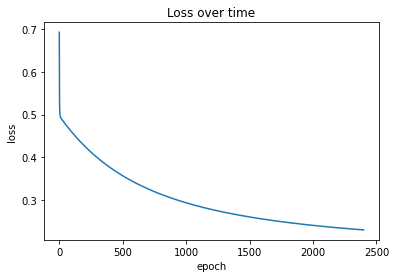

In [14]:
plt.title('Loss over time')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(np.arange(len(lossVanilla)), lossVanilla)

Training Accuracy

In [15]:
X = np.vstack((np.ones(train_feats.shape[1]), train_feats))
m = (1 / (1 + np.exp(-1 * (W @ X)))) > 0.5
np.sum(m.astype(np.uint8) == train_label) / train_feats.shape[1]

0.9404658507698381

Testing Accuracy

In [16]:
X = np.vstack((np.ones(test_feats.shape[1]), test_feats))
m = (1 / (1 + np.exp(-1 * (W @ X)))) > 0.5
np.sum(m.astype(np.uint8) == test_label) / test_feats.shape[1]

0.957919621749409

### Mini Batch Gradient Descent

In [17]:
BATCH_SIZE = 1000
LR = 0.01
EPOCH = 1200

In [18]:
# initialize weight matrix
loss = []
W = np.zeros(3).reshape((1,3))
for e in range(EPOCH):
    for X, Y in batch_generator(train_feats, train_label, BATCH_SIZE):
        # prediction (sigmoid)
        y = (1 / (1 + np.exp(-1 * (W @ X))))
        # compute loss
        l = np.mean(-1 * Y * np.log(y) - ((1 - Y) * np.log(1 - y)))
        loss.append(l)
        # calculate gradient
        g = (X @ (y - Y).T) / BATCH_SIZE
        # update weight
        W -= LR * g.T

plot loss

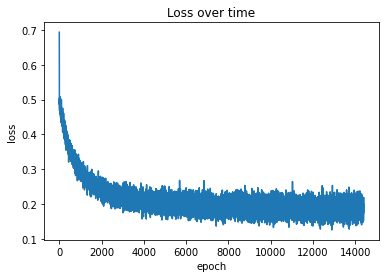

In [19]:
plt.title('Loss over time')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(np.arange(len(loss)), loss)

Training Accuracy

In [20]:
X = np.vstack((np.ones(train_feats.shape[1]), train_feats))
m = (1 / (1 + np.exp(-1 * (W @ X)))) > 0.5
np.sum(m.astype(np.uint8) == train_label) / train_feats.shape[1]

0.9471772601658113

Testing Accuracy

In [21]:
X = np.vstack((np.ones(test_feats.shape[1]), test_feats))
m = (1 / (1 + np.exp(-1 * (W @ X)))) > 0.5
np.sum(m.astype(np.uint8) == test_label) / test_feats.shape[1]

0.9621749408983451

## Task 4: Optimization

### Adam Optimizer

In [22]:
BATCH_SIZE = train_feats.shape[1]
LR = 0.01
EPOCH = 2400
b1, b2 = 0.9, 0.999
eps = 0.00000001

In [23]:
lossAdam = []
# initialize weight matrix
W = np.zeros(3).reshape((1,3))
mt_prev = 0
vt_prev = 0
for e in range(EPOCH):
    for t, (X, Y) in enumerate(batch_generator(train_feats, train_label, BATCH_SIZE)):
        # prediction (sigmoid)
        y = (1 / (1 + np.exp(-1 * (W @ X))))
        # compute loss
        l = np.mean(-1 * Y * np.log(y) - ((1 - Y) * np.log(1 - y)))
        lossAdam.append(l)
        # compute gradient
        g = (X @ (y - Y).T) / BATCH_SIZE
        # update adam parameters
        mt = (b1 * mt_prev) + ((1 - b1) * g)
        vt = (b2 * vt_prev) + ((1 - b2) * (g**2))
        # bias correction
        mt_c = mt / (1 - (b1**(t + 1)))
        vt_c = vt / (1 - (b2**(t + 1)))
        # update weight
        n = (LR * mt_c) / (np.sqrt(vt_c) + eps)
        W -= n.T
        # update momentum
        mt_prev = mt
        vt_prev = vt

plot loss

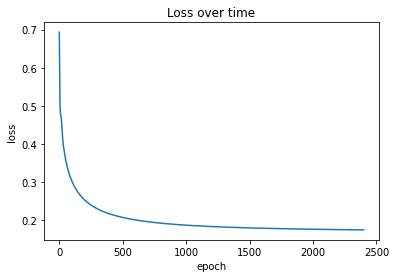

In [24]:
plt.title('Loss over time')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(np.arange(len(lossAdam)), lossAdam)

Training Accuracy

In [25]:
X = np.vstack((np.ones(train_feats.shape[1]), train_feats))
m = (1 / (1 + np.exp(-1 * (W @ X)))) > 0.5
np.sum(m.astype(np.uint8) == train_label) / train_feats.shape[1]

0.950493485984998

Testing Accuracy

In [26]:
X = np.vstack((np.ones(test_feats.shape[1]), test_feats))
m = (1 / (1 + np.exp(-1 * (W @ X)))) > 0.5
np.sum(m.astype(np.uint8) == test_label) / test_feats.shape[1]

0.9664302600472813

### RMSprop Optimizer

In [27]:
BATCH_SIZE = train_feats.shape[1]
LR = 0.01
EPOCH = 2400
gamma = 0.9
eps = 0.00000001

In [28]:
lossProp = []
# initialize weight matrix
W = np.zeros(3).reshape((1,3))
prev_eg2 = 0
for e in range(EPOCH):
    for t, (X, Y) in enumerate(batch_generator(train_feats, train_label, BATCH_SIZE)):
        # prediction (sigmoid)
        y = (1 / (1 + np.exp(-1 * (W @ X))))
        # compute loss
        l = np.mean(-1 * Y * np.log(y) - ((1 - Y) * np.log(1 - y)))
        lossProp.append(l)
        # compute gradient
        g = (X @ (y - Y).T) / BATCH_SIZE
        # update rolling sum
        eg = (gamma * (prev_eg2)) + ((1 - gamma) * (g**2))
        # update weight
        n = (LR * g) / (np.sqrt(eg + eps))
        W -= n.T
        # update momentum
        prev_eg2 = eg

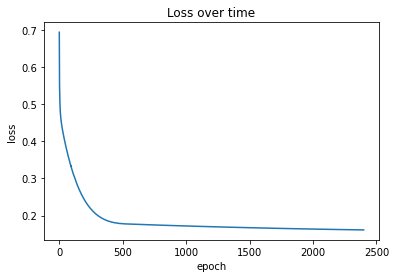

In [29]:
plt.title('Loss over time')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(np.arange(len(lossProp)), lossProp)

Training Accuracy

In [30]:
X = np.vstack((np.ones(train_feats.shape[1]), train_feats))
m = (1 / (1 + np.exp(-1 * (W @ X)))) > 0.5
np.sum(m.astype(np.uint8) == train_label) / train_feats.shape[1]

0.9530201342281879

Testing Accuracy

In [31]:
X = np.vstack((np.ones(test_feats.shape[1]), test_feats))
m = (1 / (1 + np.exp(-1 * (W @ X)))) > 0.5
np.sum(m.astype(np.uint8) == test_label) / test_feats.shape[1]

0.966903073286052

### Results

Comparison of accuracy below:

| Method | Testing Accuracy |
| --- | --- |
| Vanilla GD | 0.9579 |
| Adam | 0.9664 |
| RMSprop | 0.9669 |

Loss over time comparison:

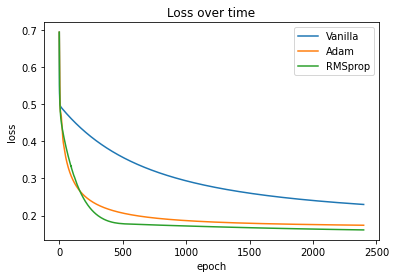

In [34]:
plt.title('Loss over time')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(np.arange(len(lossVanilla)), lossVanilla, label='Vanilla')
plt.plot(np.arange(len(lossAdam)), lossAdam, label='Adam')
plt.plot(np.arange(len(lossProp)), lossProp, label='RMSprop')
plt.legend()

First of all, just by looking at the testing accuracy, we can see that both optimzers out performs the vanilla gradient descent. Next, if we look at the loss curve above, we can clearly see that gradient descent with optimzers converges way faster than without it. Moreover, the RMSprop optimizer seems to coverges faster and to a lower loss when compared to Adam in this scenario. There is no reason not to use an optimizer for this specific task as it not only saves time, but also imporoves the accuracy. 